# Segmentation d'Images avec l'Algorithme Fuzzy C-Means

**Auteur**: Ramy Khelladi  
**Date**: 2024-10-25

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt 



In [22]:
im = cv2.imread("assets/milky-way.jpg")
im = cv2.resize(im,(256,256))
gray_im = cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)

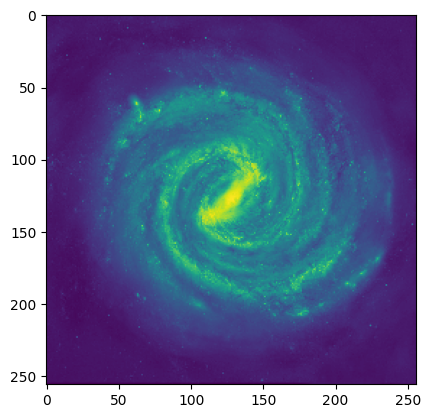

In [23]:
plt.imshow(gray_im)

In [24]:
def init_matrix(n,c):
    U = np.random.rand(n, c)
    # Normalize rows
    U = U / np.sum(U, axis=1, keepdims=True)  
    return U

In [25]:
def calculate_cluster_centers(U,X,m):
    centers = np.zeros(U.shape[1])
    Um = U ** m
    centers = np.dot(Um.T,X) / np.sum(Um.T,axis = 1,keepdims=True)
    return centers


In [26]:
def update_matrix(U, centers, X, m):
    n = X.shape[0]  
    c = centers.shape[0]  
    n_U = np.zeros((n, c))  

    # Calculate distances points and cluster centers
    dists = np.zeros((n, c))  
    for j in range(c):
        dists[:, j] = np.linalg.norm(X - centers[j], axis=1)  
    p = 2 / (m-1)
    # Update membership 
    for i in range(n):
        for j in range(c):
            d = np.sum([(dists[i, j] / (dists[i, k] ** p)) for k in range(c) if dists[i, k] != 0])  
            n_U[i, j] = 1 / d if d != 0 else 0  

    n_U /= np.sum(n_U, axis=1, keepdims=True)  

    return n_U


In [31]:
def fuzzy_c_means(X, c, m=2, max_iter=20, tol=1e-5):
    n = X.shape[0]
    U = init_matrix(n, c)
    centers = np.random.rand(c, X.shape[1])  

    for _ in range(max_iter):
        U_old = U.copy()  
        centers = calculate_cluster_centers(U, X, m)  
        U = update_matrix(U, centers, X, m) 
        if np.linalg.norm(U - U_old) < tol:
            break

    return U, centers


In [28]:
def cluster_image(U,centers,img):
    img_shape = img.shape
    cluster_img = np.zeros(img_shape)
    cluster_choice = np.argmax(U,axis=1)
    cluster_choice = cluster_choice.reshape(img_shape)
    n_centers = centers.shape[0]
    for j in range (n_centers):
        cluster_img[cluster_choice==j] = centers[j]
    return cluster_img


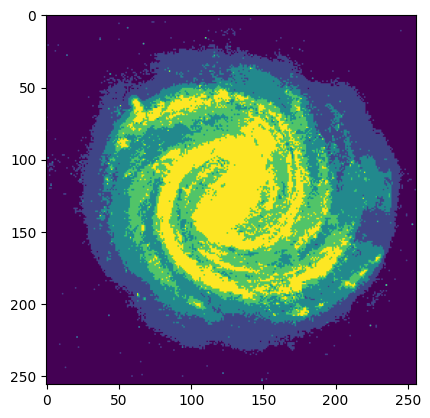

In [32]:
I = gray_im
I = I / 255
X = I.reshape(-1,1)
# Number of clusters
c = 5
# Fuzziness 
m = 2
n = X.size
U, centers = fuzzy_c_means(X, c, m)
c_i = cluster_image(U,centers,I)
plt.imshow(c_i)


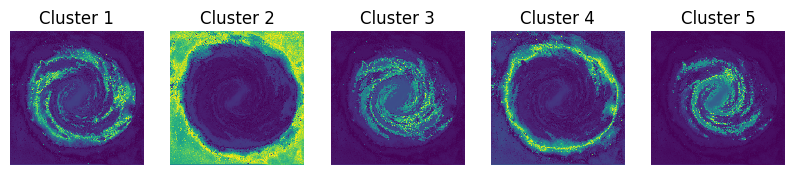

In [38]:
I = im
I = I / 255
X = I.reshape(-1,3)
c = 5
m = 2
n = X.size
U, centers = fuzzy_c_means(X, c, m)

plt.figure(figsize=(10, 10))

for j in range(c):
    membership_heatmap = U[:, j].reshape(im.shape[0], im.shape[1])
    
    # Display heatmap for current cluster
    plt.subplot(1, c, j + 1)
    plt.imshow(membership_heatmap, cmap='viridis', interpolation='nearest')
    plt.title(f'Cluster {j + 1}')
    plt.axis('off')

plt.show()